In [1]:
import os
import json
import subprocess
import numpy as np
import pandas as pd
import pickle as pkl
import nibabel as nib
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from os.path import join as pjoin
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from nilearn.glm.first_level import make_first_level_design_matrix

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams.update({'font.size': 12, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

# define path
beta_path = '/nfs/z1/zhenlab/BrainImageNet/action/data/bold/derivatives/beta'
fmriprep_path = '/nfs/z1/zhenlab/BrainImageNet/action/data/bold/derivatives/fmriprep'
ciftify_path = '/nfs/z1/zhenlab/BrainImageNet/action/data/bold/derivatives/ciftify'
nifti_path = '/nfs/z1/zhenlab/BrainImageNet/action/data/bold/nifti'

/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [2]:
def save_ciftifile(data, filename):
    template = '/nfs/z1/zhenlab/BrainImageNet/NaturalObject/data/bold/Analysis_derivatives/ciftify/sub-core02/MNINonLinear/Results/ses-ImageNet01_task-object_run-1/ses-ImageNet01_task-object_run-1_Atlas.dtseries.nii'
    ex_cii = nib.load(template)
    ex_cii.header.get_index_map(0).number_of_series_points = data.shape[0]
    nib.save(nib.Cifti2Image(data.astype(np.float32), ex_cii.header), filename)

def roi_mask(roi_name):
    """
        roi_name : list or str
    """
    # load reference info
    main_path = '/nfs/z1/zhenlab/BrainImageNet/Analysis_results/'
    roi_name_path = pjoin(main_path, 'roilbl_mmp.csv')
    roi_names = pd.read_csv(roi_name_path)
    roi = sio.loadmat(pjoin(main_path, 'MMP_mpmLR32k.mat'))['glasser_MMP']  # 1x59412

    # start load name
    roi_index = []
    if isinstance(roi_name, str):
        roi_tmp_index = roi_names.loc[roi_names.isin([f'L_{roi_name}_ROI']).any(axis=1)].index[0]+1
        roi_index.extend([roi_tmp_index, roi_tmp_index+180])
        mask = np.asarray([True if x in roi_index else False for x in roi[0]])
    else:
        for name in roi_name:
            roi_tmp_index = roi_names.loc[roi_names.isin([f'L_{name}_ROI']).any(axis=1)].index[0]+1
            roi_index.extend([roi_tmp_index, roi_tmp_index+180])
        mask = np.asarray([True if x in roi_index else False for x in roi[0]])
    return mask

# define path
main_path = '/nfs/z1/zhenlab/BrainImageNet/Analysis_results/'

EVC_name = ['V1', 'V2', 'V3']
VTC_name = ['V8', 'PIT', 'FFC', 'VVC', 'VMV1', 'VMV2', 'VMV3']
LO_name = ['LO1', 'LO2', 'MST', 'MT', 'TPOJ3', 'TPOJ2', 'V4t']
AIP_name = ['1', '2', '3a']

roi_sum = ['EVC', 'VTC', 'LO', 'AIP']
for roi in roi_sum:
    exec(f'{roi}_mask = roi_mask({roi}_name)')
    print(eval(f'{roi}_mask').sum())


3551
1244
980
2619


In [3]:
from scipy.stats import pearsonr

# Load beta for 30 subjects 
sub_names = sorted([i for i in os.listdir(beta_path) if i.startswith('sub')])
mask_sum = ['EVC', 'VTC', 'LO', 'AIP']
n_sub = len(sub_names)
n_class = 180

beta_sum = np.zeros((n_sub, n_class, 59412))
for sub_idx, sub_name in enumerate(sub_names):
    # define beta path
    beta_sub_path = pjoin(beta_path, sub_name, f'{sub_name}_action-beta_clean.npy')
    beta_sub = np.load(beta_sub_path)
    scaler = StandardScaler()
    beta_sum[sub_idx] = scaler.fit_transform(beta_sub)

beta_sum = beta_sum.mean(axis=0)

In [8]:
# load animacy labels
beh_path = '/nfs/z1/userhome/ZhouMing/workingdir/BIN/utils/action_spaces/behavior'
beh_df = pd.read_csv(pjoin(beh_path, 'dim_scores.csv'), index_col=0)
beh_df['mean_score'] = beh_df.iloc[:, 2:].mean(axis=1)
beh_df = beh_df.drop(beh_df.columns[2:22], axis=1)
beh_df = beh_df.sort_values(by='class')

/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish transitivity EVC


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish transitivity VTC


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish transitivity LO


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish transitivity AIP


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish sociality EVC


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish sociality VTC


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish sociality LO


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish sociality AIP


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish dangerousness EVC


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish dangerousness VTC


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish dangerousness LO


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish dangerousness AIP


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish menace EVC


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish menace VTC


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish menace LO


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish menace AIP


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish intensity EVC


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish intensity VTC


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish intensity LO


/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/neurosoft/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Finish intensity AIP


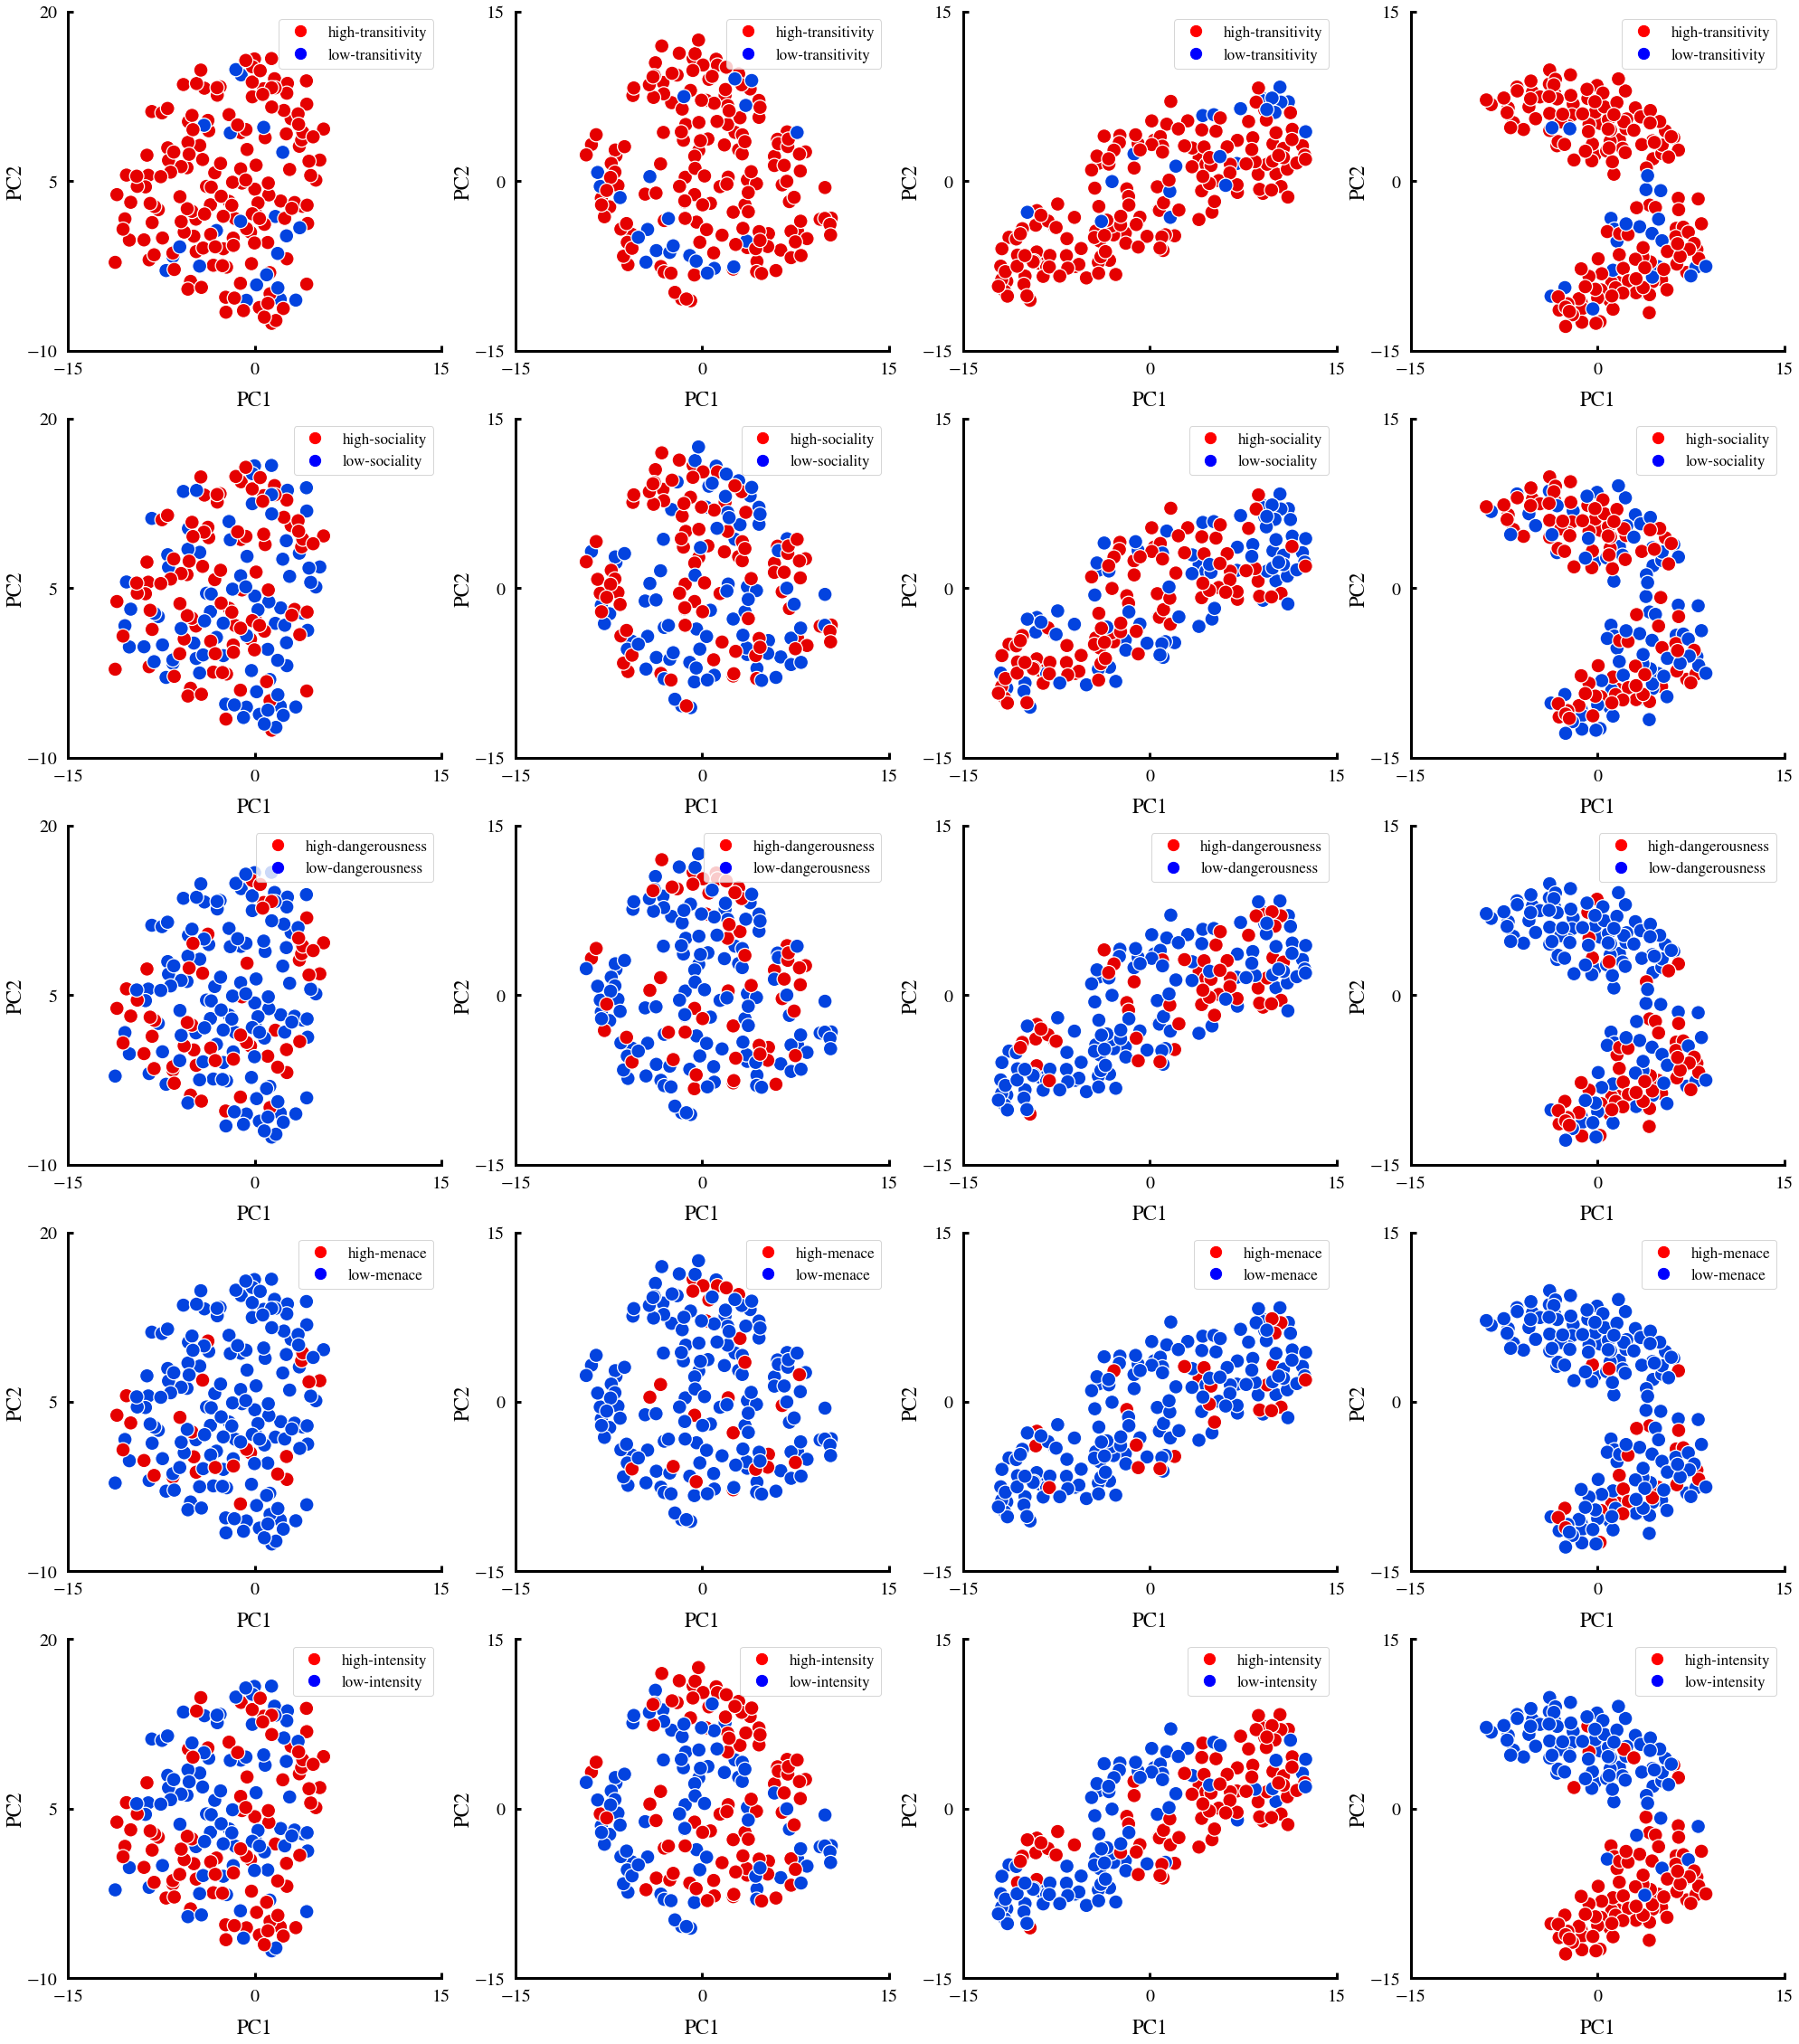

In [12]:
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D

# define utils
model_name = 'tsne'

dims = np.delete(beh_df['dim'].unique(), 0)
# define plot details
fig, ax = plt.subplots(dims.shape[0], len(roi_sum), figsize=(34, 40))
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams.update({'font.size': 14, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
colors = ['red', 'blue']
custom = [Line2D([], [], marker='o', markersize=np.sqrt(150), color='red', linestyle='None'),
          Line2D([], [], marker='o', markersize=np.sqrt(150), color='blue', linestyle='None')]
tick_range = {'EVC':(-15,15,-10,20), 'VTC':(-15,15,-15,15), 'LO':(-15,15,-15,15), 'AIP':(-15,15,-15,15)}
# {'EVC':(-90,110,-50,60), 'VTC':(-70,70,-50,50), 'LO':(-90,110,-50,60), 'AIP':(-90,110,-50,60)}
# (-15,15,-15,15)
for dim_idx, dim in enumerate(dims):
    # get label
    dim_score = beh_df.loc[beh_df['dim']==dim, 'mean_score'].to_numpy()
    dim_content = np.array(['high-'+dim if item > 4 else 'low-'+dim for item in dim_score])
    for idx, check_roi in enumerate(roi_sum):
        axes = ax[dim_idx, idx]
        mask = eval(f'{check_roi}_mask')
        # specialized voxel loc
        class_pattern = beta_sum[:, mask]
        # Scale and select voxel in data
        scaler = StandardScaler()
        class_pattern = scaler.fit_transform(class_pattern)
        # plot 2 dimensional subspace
        X, y =  class_pattern, dim_content
        # define model
        if model_name == 'tsne':
            model = TSNE(n_components=2, n_iter=10000, random_state=123)
        elif model_name == 'pca':
            model = PCA(n_components=2)
        # transform data
        X_transformed = model.fit_transform(X)
        # explained_variance = model.explained_variance_ratio_[:2].sum()
        df = pd.DataFrame()
        df["label"] = dim_content #['animate' if item == 1 else 'inanimate' for item in y]
        df["comp-1"] = X_transformed[:,0]
        df["comp-2"] = X_transformed[:,1]
        # plot data
        sns.scatterplot(ax=axes, x="comp-1", y="comp-2", hue='label', s=250, legend='brief',
                        palette=sns.xkcd_palette(colors), #sns.color_palette("hls", 4), 
                        data=df)
        # axes.set_title('%s: %.3f'%(check_roi, explained_variance), fontsize=25)
        axes.set_xlabel('PC1', fontsize=23, labelpad=15)
        axes.set_ylabel('PC2', fontsize=23, labelpad=1)
        axes.tick_params(labelsize=20, width=3, length=6, direction="in", pad=12)
        axes_range = tick_range[check_roi]
        axes.set_xlim(axes_range[0], axes_range[1])
        axes.set_xticks(np.linspace(axes_range[0], axes_range[1], 3,dtype=int))
        axes.set_ylim(axes_range[2], axes_range[3])
        axes.set_yticks(np.linspace(axes_range[2], axes_range[3], 3,dtype=int))    
        axes.legend(custom, ['high-'+dim, 'low-'+dim], loc='upper right', fontsize=17)
        # set axes lines
        axes.spines['top'].set_visible(False)
        axes.spines['right'].set_visible(False)
        axes.spines['bottom'].set_linewidth(3)
        axes.spines['left'].set_linewidth(3)
        print(f'Finish {dim} {check_roi}')
    